# Mining osteo data

In [119]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Variables de interes

* distribucion por edad 
* ubicacion (parte del cuerpo) por frecuencia
* tiempo que toma la derivacion (inicio sintomatologia)
* presencia de metastasis al dg
* tratamiento


* Necesitamos sacar una proyeccion de la tendencia en X yr : cantidad de pacientes anual
* Correlaciones:
    - CORRELACION / TIEMPO: tiempo que toma la derivacion vs fecha biopsia vs region
    - HISTOGRAMA: Biopsia
    - HISTOGRAMA: distribucion por sexo y edad
    - HISTOGRAMA: region comprometida (parte del cuerpo)
    - HISTOGRAMA: metastasis con tiempo de metastasis
    - CORRELACION: segmento comprometido vs grado (H vs L) vs edad/sexo
    - HISTOGRAMA: tendencia anual
    - CORRELACION:  metastasis (1 si, 2 no) vs grado
    - HISTOGRAMA: tratamiento
    - CORRELACION: tratamiento vs cirugia

Load data

In [44]:
df = pd.read_csv("pcteOS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   ﻿RUN                                        95 non-null     object
 1   Feca de Ingreso al Sistema                  95 non-null     object
 2   sexo                                        95 non-null     object
 3   edad                                        95 non-null     int64 
 4   region                                      95 non-null     object
 5   inicio sintomatologia                       93 non-null     object
 6   segmento comprometido (clasif AO)           95 non-null     int64 
 7   lateralidad                                 95 non-null     object
 8   Fecha Biopsia                               95 non-null     object
 9   Biopsia                                     95 non-null     object
 10  Grado                       

In [57]:
df["segmento comprometido (clasif AO)"].unique

<bound method Series.unique of 0     11
1     11
2     71
3     33
4     33
      ..
90    33
91    41
92    33
93    41
94    33
Name: segmento comprometido (clasif AO), Length: 95, dtype: int64>

## Histograms

### Biopsia

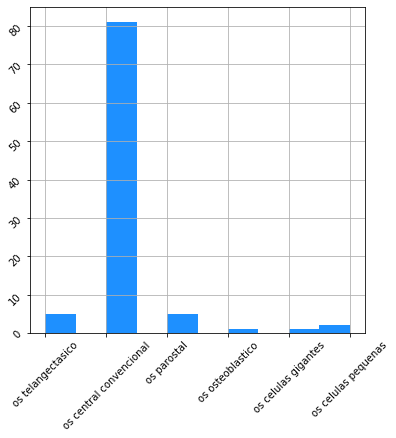

In [43]:
fig, ax = plt.subplots(1, figsize=(6, 6))
ax.hist(df["Biopsia"], color="dodgerblue")
# Setup
ax.grid()
ax.tick_params(labelrotation=45)

### Sexo y Edad

In [50]:
df_masculino = df.loc[df["sexo"] == "masculino"]
df_femenino = df.loc[df["sexo"] == "femenino"]

Text(0.5, 1.0, 'femenino')

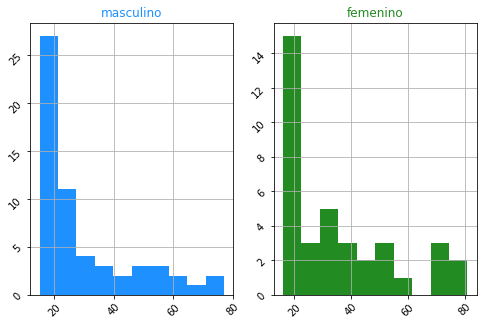

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Sexo == Masculino
ax[0].hist(df_masculino["edad"], color="dodgerblue")

# Sexo == Femenino
ax[1].hist(df_femenino["edad"], color="forestgreen")

# Setup
for axi in ax:
    axi.grid()
    axi.tick_params(labelrotation=45)
    
ax[0].set_title("masculino", fontsize=12, color="dodgerblue")
ax[1].set_title("femenino", fontsize=12, color="forestgreen")

Histograma en sus partes

In [61]:
hist, bins = np.histogram(df_masculino["edad"])

In [62]:
hist

array([27, 11,  4,  3,  2,  3,  3,  2,  1,  2])

In [63]:
bins

array([15. , 21.2, 27.4, 33.6, 39.8, 46. , 52.2, 58.4, 64.6, 70.8, 77. ])

Estadisticas individuales

In [65]:
np.median(df_masculino["edad"]), np.percentile(df_masculino["edad"], 95)

(22.0, 61.04999999999999)

Descripcion rapida

In [66]:
df_masculino["edad"].describe()

count    58.000000
mean     30.000000
std      15.916449
min      15.000000
25%      19.000000
50%      22.000000
75%      36.500000
max      77.000000
Name: edad, dtype: float64

In [68]:
df_femenino["edad"].describe()

count    37.000000
mean     35.270270
std      19.190056
min      16.000000
25%      19.000000
50%      29.000000
75%      45.000000
max      81.000000
Name: edad, dtype: float64

Relacion de cantidad 

In [72]:
print("N_masc={0}, \nN_fem={1}, \nRatio masc/fem={2}".format(
    df_masculino["edad"].count() , 
    df_masculino["edad"].count(), 
    df_masculino["edad"].count() / df_masculino["edad"].count()
))

N_masc=58, 
N_fem=58, 
Ratio masc/fem=1.0


### Segmento Comprometido (clasif AO)

Text(0.5, 1.0, 'Calsificacion AO')

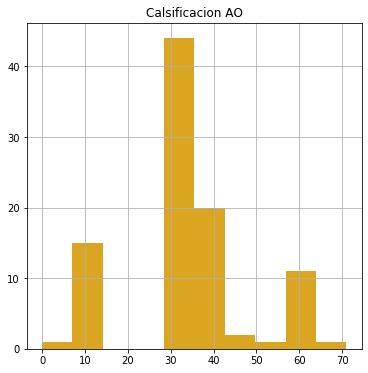

In [80]:
fig, ax = plt.subplots(1, figsize=(6, 6))

ax.hist(df["segmento comprometido (clasif AO)"], color="goldenrod")

ax.grid()
ax.set_title("Clasificacion AO")

In [89]:
aux_unique = df["segmento comprometido (clasif AO)"].unique()

for x in aux_unique:
    nx = len(df.loc[df["segmento comprometido (clasif AO)"] == x].index)
    pcent = nx * 100. / len(df["segmento comprometido (clasif AO)"].index)
    print("AO={0} es el {1:.1f} % del total".format(x, pcent))

AO=11 es el 13.7 % del total
AO=71 es el 1.1 % del total
AO=33 es el 38.9 % del total
AO=41 es el 21.1 % del total
AO=61 es el 11.6 % del total
AO=52 es el 1.1 % del total
AO=43 es el 2.1 % del total
AO=31 es el 6.3 % del total
AO=13 es el 1.1 % del total
AO=12 es el 1.1 % del total
AO=32 es el 1.1 % del total
AO=0 es el 1.1 % del total


### Tendencia anual

In [113]:
df["Feca de Ingreso al Sistema"] = pd.to_datetime(df["Feca de Ingreso al Sistema"])

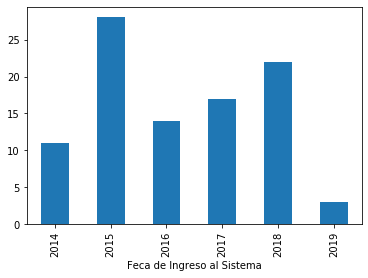

In [116]:
df["Feca de Ingreso al Sistema"].groupby(df["Feca de Ingreso al Sistema"].dt.year).count().plot(kind='bar')

Ajuste polinomial entre 2014 y 2018

In [117]:
df["Feca de Ingreso al Sistema"].groupby(df["Feca de Ingreso al Sistema"].dt.year).count()

Feca de Ingreso al Sistema
2014    11
2015    28
2016    14
2017    17
2018    22
2019     3
Name: Feca de Ingreso al Sistema, dtype: int64

In [122]:
fecha = [2014, 2015, 2016, 2017, 2018]
N = [11, 28, 14, 17, 22]
df_aux = pd.DataFrame({"fecha":fecha, "n_casos":N})

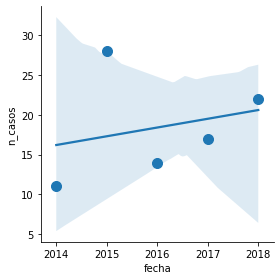

In [136]:
sns.lmplot(x="fecha", y="n_casos", data=df_aux,
           palette="bright", height=4,
           scatter_kws={"s": 100, "alpha": 1})

### Tratamiento

Text(0.5, 1.0, 'Tratamiento (1:qx, 2:cx, 3:rt)')

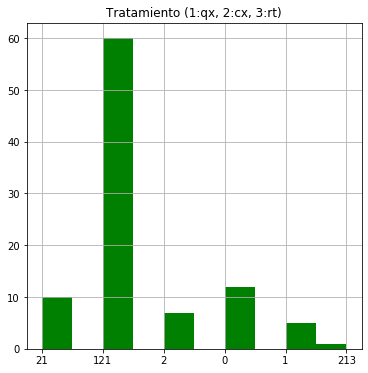

In [134]:
fig, ax = plt.subplots(1, figsize=(6, 6))

ax.hist(df["tratamiento (1:qx, 2:cx)"].map(str), color="green")

ax.grid()
ax.set_title("Tratamiento (1:qx, 2:cx, 3:rt)")

In [135]:
aux_unique2 = df["tratamiento (1:qx, 2:cx)"].unique()

for x in aux_unique2:
    nx = len(df.loc[df["tratamiento (1:qx, 2:cx)"] == x].index)
    pcent = nx * 100. / len(df["tratamiento (1:qx, 2:cx)"].index)
    print("tratamiento={0} es el {1:.1f} % del total".format(x, pcent))

tratamiento=21 es el 10.5 % del total
tratamiento=121 es el 63.2 % del total
tratamiento=2 es el 7.4 % del total
tratamiento=0 es el 12.6 % del total
tratamiento=1 es el 5.3 % del total
tratamiento=213 es el 1.1 % del total


## Estadistica simple

### Tiempo de metastasis (meses)

In [103]:
aux_tiempoMet = df.loc[df["tiempo de metastasis (meses)"] != "no", "tiempo de metastasis (meses)"].map(int).values

In [104]:
aux_tiempoMet

array([ 0,  0,  0,  0,  0,  0,  1,  1,  3, 12, 24,  0,  0, 10,  6,  0,  0,
       24, 10,  6,  0,  0,  0,  0,  9,  0,  0,  0,  4,  0,  0,  0,  0,  0,
        0,  0,  0,  3,  0,  4,  0,  0])

In [106]:
print("Tiempo de metastasis: {0:.1} meses".format(aux_tiempoMet.mean()))

Tiempo de metastasis: 3e+00 meses


## Correlaciones

### Tratamiento vs Cirugia

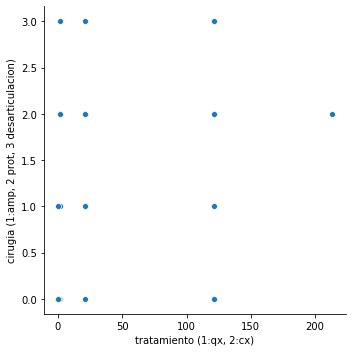

In [142]:
sns.relplot(x="tratamiento (1:qx, 2:cx)", 
            y="cirugia (1:amp, 2 prot, 3 desarticulacion)", 
            data=df,)

### Inicio de sintomas vs Grado

In [156]:
inis = df_aux3["inicio sintomatologia"].values
tmp_inicio = []
for i in inis:
    if isinstance(i, str):
        i = i.replace(" ", "")
        i = i.replace("m", "")
        i = i.replace("M", "")
    tmp_inicio.append(i)

In [164]:
df_aux3 = df.copy()
df_aux3["inicio sintomatologia"] = tmp_inicio
df_aux3["inicio sintomatologia"] = df_aux3["inicio sintomatologia"].map(float)
df_aux3["metastasis (1 si, 2 no)"] = df_aux3["metastasis (1 si, 2 no)"].map(str)
# df_aux3.head()

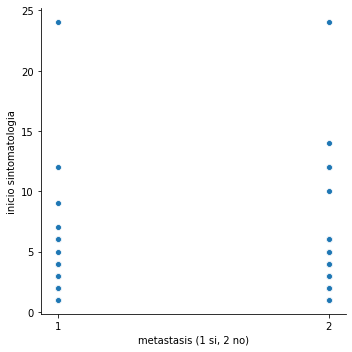

In [165]:
sns.relplot(x="metastasis (1 si, 2 no)", 
            y="inicio sintomatologia", 
            data=df_aux3,)

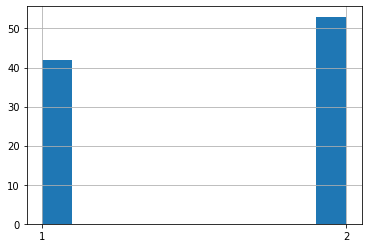

In [166]:
df_aux3["metastasis (1 si, 2 no)"].hist()

In [171]:
np.histogram(df_aux3["metastasis (1 si, 2 no)"].map(int).values)

(array([42,  0,  0,  0,  0,  0,  0,  0,  0, 53]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))

In [172]:
print("42=SI, 53=NO")

42=SI, 53=NO
